In [1]:
import pandas as pd

#IMPLEMENTACE VÍCEVRSTVÉHO PERCEPTRONU, KTERÝ KLASIFIKUJE KVĚTY KOSTACŮ Z DATASETU IRIS
path = open('iris.data')
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(path, names = names)

In [2]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
#Assign data from first four columns to X variabel
X = irisdata.iloc[:, 0:4]

#Assign data from fifth column to y variable
y = irisdata.select_dtypes(include=[object])

In [12]:
X.head(3)

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [13]:
y.head(3)

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


In [14]:
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [16]:
y.Class.unique()

array([0, 1, 2])

In [17]:
#dataset se rozdělí na trénovací a testovací množinu 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
#škálování
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [19]:
from sklearn.neural_network import  MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [20]:
predictions = mlp.predict(X_test)

C:\Users\MiC\Documents\Python\su_cv01\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 2  0  7]
 [ 0  0 14]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.00      0.00      0.00        14
           2       0.25      1.00      0.40         7

    accuracy                           0.30        30
   macro avg       0.42      0.41      0.25        30
weighted avg       0.36      0.30      0.20        30



C:\Users\MiC\Documents\Python\su_cv01\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MiC\Documents\Python\su_cv01\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MiC\Documents\Python\su_cv01\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


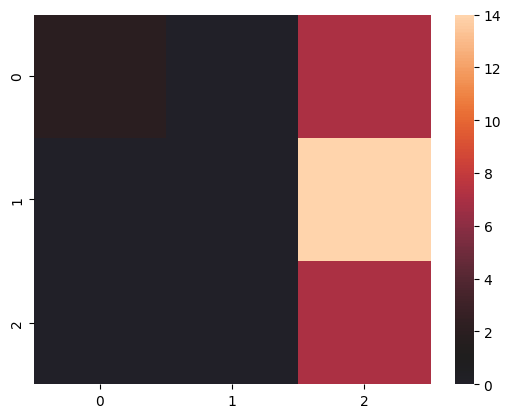

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, center = True)
plt.show()